<a href="https://colab.research.google.com/github/knoppin1/DATA-690-WANG/blob/master/Assignment_07/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [1]:
# <1> 
# Import libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [2]:
# <2> 
# Display the current working directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

working_directory = os.getcwd()

Unzip the "CollegeScorecard_Raw_data.zip" file.

- Reference: https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/

In [7]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall()

In [31]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

UNZIPPED_DIRECTORY = "CollegeScorecard_Raw_Data"
contents = os.listdir()
contents

['.config',
 '.ipynb_checkpoints',
 'CollegeScorecard_Raw_Data',
 'CollegeScorecard_Raw_Data.zip',
 'sample_data']

Get list of files extracted from the zip file

In [32]:
UNZIPPED_DIRECTORY = "CollegeScorecard_Raw_Data"
if UNZIPPED_DIRECTORY in contents:
    directory_path = working_directory + '/' + UNZIPPED_DIRECTORY
    contents = os.listdir(path=directory_path)

contents

['MERGED1998_99_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2009_10_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1999_00_PP.csv',
 '.DS_Store',
 'MERGED2004_05_PP.csv',
 'MERGED2008_09_PP.csv',
 'Crosswalks.zip',
 'MERGED2010_11_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2011_12_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2015_16_PP.csv',
 'data.yaml']

In [33]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

MERGED_SUBSTRING = "MERGED"
yearly_data_files = [file_name for file_name in contents if MERGED_SUBSTRING in file_name]
yearly_data_files

['MERGED1998_99_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2015_16_PP.csv']

In [34]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.


Function: get_year

In [35]:
def get_year(file_name):
    """ get_year : extracts year from file name (ex. 'MERGED1998_99_PP.csv' returns 1998 as an integer)"""
    
    s = file_name.strip(MERGED_SUBSTRING) # Strip "MERGED" from file name
    underscore_location = s.find('_')     # Find first underscore location
    year = int(s[:underscore_location])   # Remove trailing characters after first underscore

    return year

Test get_year()

In [36]:
# Test get_year with the expected format for csv file names.
get_year('MERGED1998_99_PP.csv')    

1998

In [37]:
list_of_dataframes = []
columns_of_interest = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]
for file_name in yearly_data_files:
    file = directory_path + '/' + file_name
    df = pd.read_csv(file, header = 0, usecols = columns_of_interest) 
    df['Year'] = get_year(file_name)
    print(file_name,'\t',df.shape)
    list_of_dataframes.append(df)
print(str(len(list_of_dataframes)) + ' total dataframes in list')

MERGED1998_99_PP.csv 	 (6702, 7)
MERGED2006_07_PP.csv 	 (6951, 7)
MERGED2007_08_PP.csv 	 (6971, 7)
MERGED2003_04_PP.csv 	 (6673, 7)
MERGED2009_10_PP.csv 	 (7217, 7)
MERGED2016_17_PP.csv 	 (7238, 7)
MERGED2001_02_PP.csv 	 (6725, 7)
MERGED2017_18_PP.csv 	 (7112, 7)
MERGED2002_03_PP.csv 	 (6652, 7)
MERGED2013_14_PP.csv 	 (7869, 7)
MERGED2018_19_PP.csv 	 (6806, 7)
MERGED2000_01_PP.csv 	 (6654, 7)
MERGED1999_00_PP.csv 	 (6609, 7)
MERGED2004_05_PP.csv 	 (6747, 7)
MERGED2008_09_PP.csv 	 (7055, 7)
MERGED2010_11_PP.csv 	 (7470, 7)
MERGED2014_15_PP.csv 	 (7766, 7)
MERGED2011_12_PP.csv 	 (7746, 7)
MERGED2012_13_PP.csv 	 (7862, 7)
MERGED1997_98_PP.csv 	 (6934, 7)
MERGED2005_06_PP.csv 	 (6899, 7)
MERGED1996_97_PP.csv 	 (7007, 7)
MERGED2015_16_PP.csv 	 (7666, 7)
23 total dataframes in list


Concatenate dataframes in list into a single large dataframe

In [75]:
df = pd.concat(list_of_dataframes)

Check data types of dataframe columns

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 7665
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44911 non-null   float64
 5   TUITIONFEE_IN  79194 non-null   float64
 6   Year           163331 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 10.0+ MB


In [39]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)


Number of observations

In [55]:
df.shape[0]

163331

Number of variables

In [56]:
df.shape[1]

7

Dataframe head (first 5 rows)

In [57]:
df.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
0,100654,Alabama A & M University,AL,5.0,NaN,NaN,1998
1,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1998
2,100690,Amridge University,AL,5.0,NaN,NaN,1998
3,100706,University of Alabama in Huntsville,AL,5.0,NaN,NaN,1998
4,100724,Alabama State University,AL,5.0,NaN,NaN,1998


Dataframe tail (last 5 rows)

In [58]:
df.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
7661,48154401,National Personal Training Institute of Cleveland,OH,3.0,NaN,NaN,2015
7662,48387801,Bay Area Medical Academy - San Jose Satellite ...,CA,8.0,NaN,NaN,2015
7663,48400201,High Desert Medical College - Bakerfield,CA,8.0,NaN,31107.0,2015
7664,48414501,Vantage College-San Antonio,TX,6.0,NaN,NaN,2015
7665,48621101,American Institute of Pharmaceutical Technolog...,NJ,2.0,NaN,NaN,2015


Take a sample of the dataframe (15 random elements)

In [79]:
df.sample(n=15, random_state=1)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
3481,198710,Isothermal Community College,NC,5.0,NaN,NaN,1997
333,114549,Fielding Graduate University,CA,8.0,NaN,NaN,2013
4074,232946,Northern Virginia Community College,VA,5.0,NaN,3485.0,2012
6668,444042,National University College-Rio Grande,PR,9.0,0.8782,4480.0,2003
4564,222178,Abilene Christian University,TX,6.0,NaN,NaN,1997
4502,230995,Norwich University,VT,1.0,0.9081,15914.0,2001
5381,443137,Irene's Myomassology Institute,MI,3.0,NaN,NaN,2015
4262,212382,Empire Beauty School-Harrisburg,PA,2.0,NaN,NaN,1996
1764,161235,University of Maine at Fort Kent,ME,1.0,NaN,4740.0,2005
3494,215655,Robert Morris University,PA,2.0,0.8234,24064.0,2012


Check for missing values in the dataframe

In [80]:
df.isnull().any()

UNITID           False
INSTNM           False
STABBR           False
REGION            True
ADM_RATE          True
TUITIONFEE_IN     True
Year             False
dtype: bool

NaNs have been found in the REGION, ADM_RATE, and TUITIONFEE_IN columns.

Typically either replace NaNs with zeros or delete the rows containing the NaNs.  

For this assignment, the goal is to investigate the percentage increases in tuition fees.  So, delete the rows for institutions that didn't report tuition fees (i.e., NaNs in TUITIONFEE_IN column).



In [81]:
# Ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
df = df[df['TUITIONFEE_IN'].notna()]
df.isnull().any()

UNITID           False
INSTNM           False
STABBR           False
REGION           False
ADM_RATE          True
TUITIONFEE_IN    False
Year             False
dtype: bool

Re-check dataframe shape and notice the impact in reduced rows and disk space (approximately half)

In [82]:
df.shape

(79194, 7)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79194 entries, 1 to 7663
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         79194 non-null  int64  
 1   INSTNM         79194 non-null  object 
 2   STABBR         79194 non-null  object 
 3   REGION         79194 non-null  float64
 4   ADM_RATE       38088 non-null  float64
 5   TUITIONFEE_IN  79194 non-null  float64
 6   Year           79194 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 4.8+ MB


Check statistics on the dataframe

In [84]:
df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,Year
count,7.919400e+04,79194.000000,38088.000000,79194.000000,79194.000000
mean,1.154812e+06,4.459883,0.680239,11665.505367,2009.133962
std,5.255923e+06,2.132732,0.207980,9985.998016,5.354756
min,1.006540e+05,0.000000,0.000000,0.000000,2000.000000
25%,1.573310e+05,3.000000,0.549400,3776.000000,2005.000000
50%,1.994580e+05,5.000000,0.704100,9285.000000,2009.000000
75%,2.404598e+05,6.000000,0.831800,16146.000000,2014.000000
max,4.900540e+07,9.000000,1.000000,74787.000000,2018.000000


In [85]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.


umbc_df = df[df['INSTNM'].str.contains('Maryland') & df['INSTNM'].str.contains('Baltimore County')]


(19, 7)

In [128]:
umbc_df = umbc_df.sort_values(by=['TUITIONFEE_IN'])
umbc_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1779,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
1767,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009


In [129]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)


In [130]:
# Number of observations and variables, respectively
umbc_df.shape

(19, 7)

In [131]:
# Head
umbc_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004


In [132]:
# Tail
umbc_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [133]:
# Sample
umbc_df.sample(n=5, random_state=1)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1710,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002


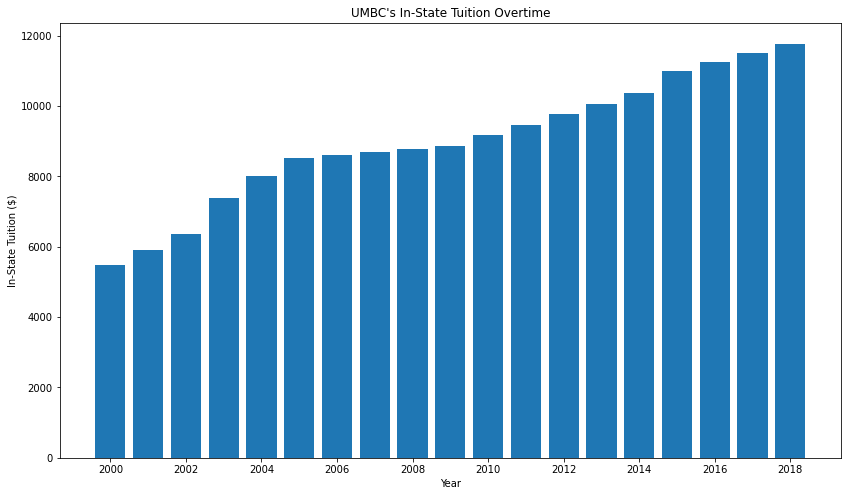

In [134]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(14,8))

ax.bar(umbc_df['Year'], umbc_df['TUITIONFEE_IN'])
ax.set_title("UMBC's In-State Tuition Overtime")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition ($)")

# Ref: https://www.scivision.dev/matplotlib-force-integer-labeling-of-axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=18,integer=True))

fig.show()

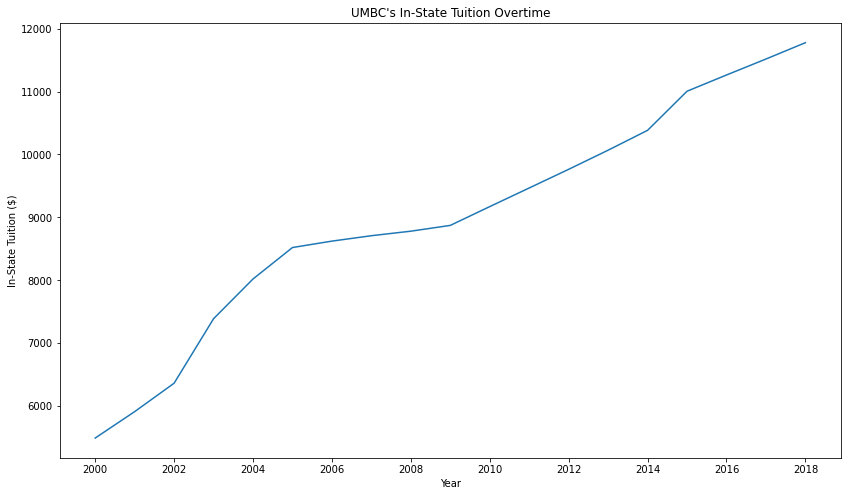

In [135]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

fig, ax = plt.subplots(figsize=(14,8))

#umbc_df.plot(kind='line',x='Year',y='TUITIONFEE_IN')
ax.plot(umbc_df['Year'], umbc_df['TUITIONFEE_IN'])
ax.set_title("UMBC's In-State Tuition Overtime")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition ($)")

# Ref: https://www.scivision.dev/matplotlib-force-integer-labeling-of-axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=18,integer=True))

plt.show()


In [ ]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)

In [ ]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)

In [ ]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)

In [ ]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)

In [ ]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)



In [ ]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)

 

In [ ]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)


In [ ]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)



In [ ]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)



In [ ]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)



In [ ]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)



In [ ]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)



In [ ]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)



In [ ]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)



In [ ]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)



In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)



In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)



In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
#### blah, blah 
#### blah, blah
#### ...
#### blah, blah

In [ ]:
# The end.